In [40]:
! pip install --target=$nb_path simpy  # Se debe instalar la librería Simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import simpy            # Se instalan las librerías que se utilizarán para el código (esto sin tomar en cuenta la gráficación)
import numpy as np

In [42]:
def warehouse_run(env, order_cutoff, order_target):        #Se define la función donde se inicia y ejecuta el problema
  global inventory, balance, num_ordered                   #Se declarám las variables que serán utilizadas en el programa

  inventory = order_target         #Inventario que se tiene como objetivo del pedido
  balance = 0.0                    #Balance inicial que se refiere a la ganancia comenzará en cero
  num_ordered = 0                  #Número de los pedidos por lo que se comenzará en cero

  while True:           #Se hace uso de un ciclo infinito
    interarrival = generate_interarrival()    #Se genera la llegada entre cada cliente
    yield env.timeout(interarrival)           #Se genera la terminación del tiempo en que tarda en llegar cada cliente
    balance -= inventory*2*interarrival       #Se genera la perdida de la ganancia asi como el inventario pedido
    demand = generate_demand()                #Se genera la demanda de la llegada de cada cliente
    if demand < inventory:         #Si la demanda es menor al inventario pedido
      balance += 100*demand        #Se generan ganancias por la demanda del producto
      inventory -= demand          #Se genera perdida al inventario pedido dando así la demanda del pedido
      print ('{:.2f} sold {}'.format(env.now, demand))      #Se imprime el momento de la nueva demanda del producto
    else:             #Si la demanda es mayor al inventario pedido
      balance += 100*inventory     #Se genera ganancia asi como el inventario pedido
      inventory = 0       #Ya no jay pedidos en el inventario
      print ('{:.2f} sold {} (out of stock)'.format(env.now, inventory))     #Se imprime el moemto del nuevo inventario cuando esta agotado

    if inventory < order_cutoff and num_ordered == 0:      #Si el inventario pedido es menor que el corte de orden y no hay cantidad
      env.process(handle_order(env,order_target))         #de ordenes, entonces se ordena una nueva cantidad de productos para su llegada

def handle_order (env,order_target):        #Se define la función donde se ordena la llegada del objetivo del pedido nuevo
  global inventory, balance, num_ordered                  #Se vuelven a solicitar las variables declaradas anteriormente

  num_ordered = order_target - inventory      #La cantidad de productos ordenados será el resultado de la llegada del objetivo del pedido menos el inventario de este
  print ('{:.2f} placed order for {}'.format(env.now, num_ordered))    #Se imprime el momento de la nueva cantidad pedida
  balance -= 50*num_ordered      #Se genera la perdida de la ganancia dada por la cantidad de productos pedidos
  yield env.timeout(2.0)         #Se genera la terminación del tiempo en que tarda en llegar el producto, en este caso 2 días
  inventory += num_ordered       #Se genera un aumento en el inventario por las cantidades ordenadas de producto
  num_ordered = 0       #Ya no hay pedidos en espera por lo que será cero
  print ('{:.2f} received order, {} in inventory'.format(env.now, inventory))    #Se imprime el momento del nuevo inventario por orden recibida

def generate_interarrival():      #Se define la función que genera la llegada entre cada cliente
  return np.random.exponential(1./5)      #Genera el tiempo que ha pasado

def generate_demand():       #Se define la función que genera la demanda de la llegada de un cliente
  return np.random.randint(1, 5)       #La demanda de un cliente

obs_time = []       #Se genera una lista vacía para los tiempos de cada observación
inventory_level = []       #Se genera una lista vacía para los niveles de inventario de cada observación

def observe(env):        #Se define la función de las observaciones del inventario del pedido
  global inventory       #Se vuelve a solicitar la variable inventario

  while True:       #Se hace uso de un ciclo infinito
    obs_time.append(env.now)               #Es la lista donde se almacenan los tiempos de cada observación
    inventory_level.append(inventory)      #Es la lista donde se almacenan los niveles de inventario de cada observación
    yield env.timeout(0.1)                 #Es el tiempo en que se registra cada observación, en este caso cada 0.1 días

np.random.seed(0)       #Se hace la declaración de una semilla aleatoria

env = simpy.Environment()                    #Se hace el entorno de simulación para simpy
env.process(warehouse_run(env, 25, 50))      #Se hace el proceso de simulación con ciertos parámetros
env.process(observe(env))                    #Se have el proceso de observación

env.run(until = 5.0)       #Se ejecuta la simulación hasta el quinto día

0.16 sold 2
0.53 sold 4
0.69 sold 2
0.88 sold 3
1.00 sold 3
1.01 sold 1
1.11 sold 3
1.44 sold 3
1.61 sold 2
1.97 sold 1
1.99 sold 4
1.99 placed order for 28
2.08 sold 2
2.38 sold 4
2.79 sold 4
3.11 sold 4
3.26 sold 4
3.28 sold 1
3.46 sold 2
3.99 received order, 29 in inventory
4.04 sold 4
4.06 sold 4
4.06 placed order for 29
4.12 sold 4
4.39 sold 1
4.56 sold 1
4.63 sold 2
4.82 sold 1
4.92 sold 1


Text(0, 0.5, 'inventory level')

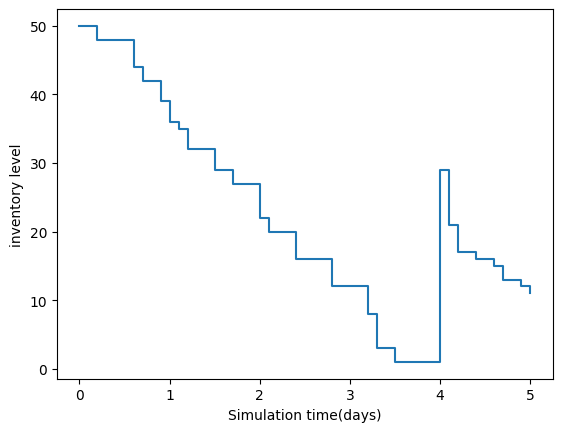

In [43]:
import matplotlib.pyplot as plt                                 #Se instala la librería para gráficar

plt.figure()                                                    #Se imprimen la observaciones obtenidas de la simulación anterior
plt.step(obs_time, inventory_level, where = 'post')
plt.xlabel('Simulation time(days)')                             #Se imprime el título de los valores en el eje x
plt.ylabel('inventory level')                                   #Se imprime el título de los valores en el eje y

In [44]:
balance #Ganancias finales

3598.0915258221166